In [1]:
from qiskit import *
from math import gcd
from qiskit.circuit.library import QFT
from qiskit.visualization import plot_histogram
from qiskit import QuantumCircuit, Aer, execute
from numpy.random import seed, randint

In [2]:
def initialize_qubits(qc, n, m):
    qc.h(range(n))
    qc.x(n+m-1)

In [3]:
def a_x_mod15(a, x):
    U = QuantumCircuit(4)        
    for iteration in range(x):
        U.swap(1,3)
        U.swap(0,2)
        for q in range(4):
            U.x(q)
    U = U.to_gate()
    U.name = f"U({x})"
    c_U = U.control()
    return c_U

In [4]:
def modular_exponentiation(qc, n, m, a):
    for x in range(n):
        exponent = 2**x
        qc.append(a_x_mod15(a, exponent), 
                     [x] + list(range(n, n+m))) 
        
def measure(qc, n):
    qc.measure(n, n)

In [5]:
def apply_iqft(qc, measurement_qubits):
    qc.append(QFT(len(measurement_qubits),do_swaps=False).inverse(),measurement_qubits)

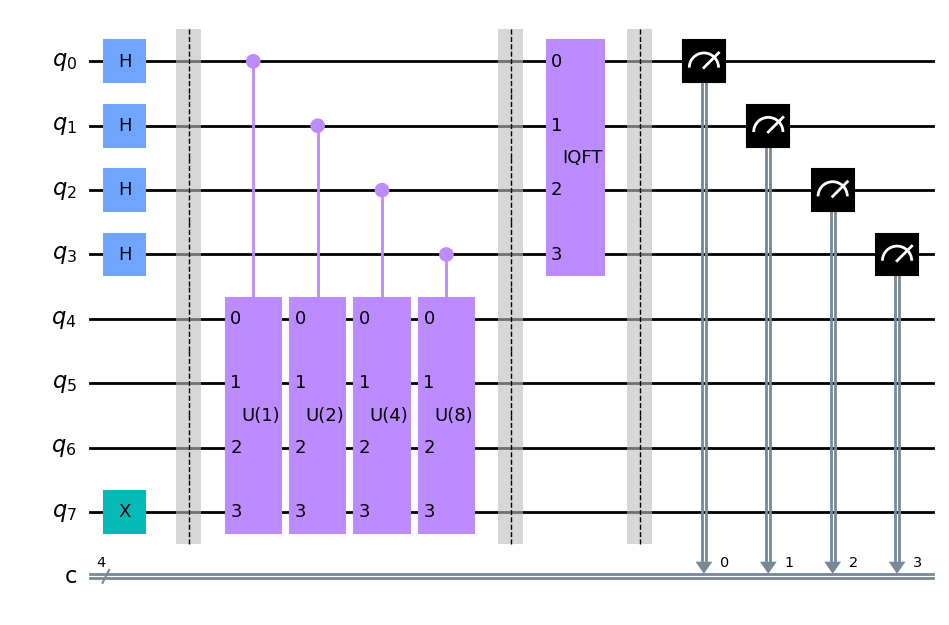

In [6]:
def period_finder(n, m, a):
    qc = QuantumCircuit(n+m, n)
    initialize_qubits(qc, n, m)
    qc.barrier()
    modular_exponentiation(qc, n, m, a)
    qc.barrier()
    apply_iqft(qc, range(n))
    qc.barrier()
    measure(qc, range(n))
    
    return qc

n = 4; m = 4; a = 11
final_circuit = period_finder(n, m, a)

final_circuit.draw(output="mpl", fold=1000)

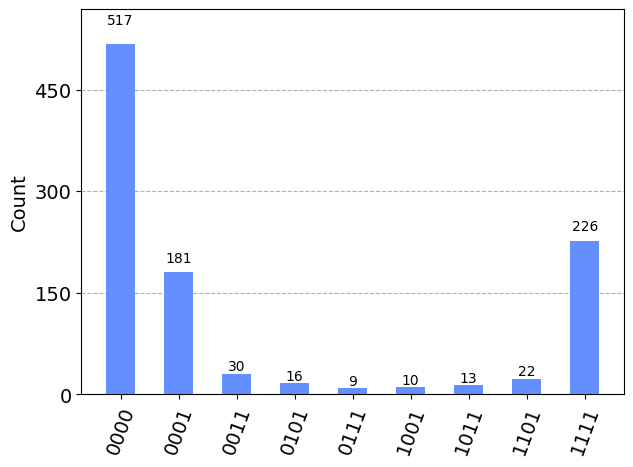

In [7]:
simulator = Aer.get_backend('qasm_simulator')
counts = execute(final_circuit, backend=simulator).result().get_counts(final_circuit)

plot_histogram(counts)

In [8]:
for i in counts:
    measured_value = int(i[::-1], 2)
    if measured_value % 2 != 0:
        continue 
    x = int((a ** (measured_value/2)) % 15)
    if (x + 1) % 15 == 0:
        continue
    factors = gcd(x + 1, 15), gcd(x - 1, 15) 
    print(factors)

(1, 15)
(3, 5)
(1, 15)
(3, 5)
(1, 15)
